K-Means Metrics:
ARI: 0.8236848491385121
NMI: 0.8153563543886516

GMM Metrics:
ARI: 0.9032594416137354
NMI: 0.8649897028119647


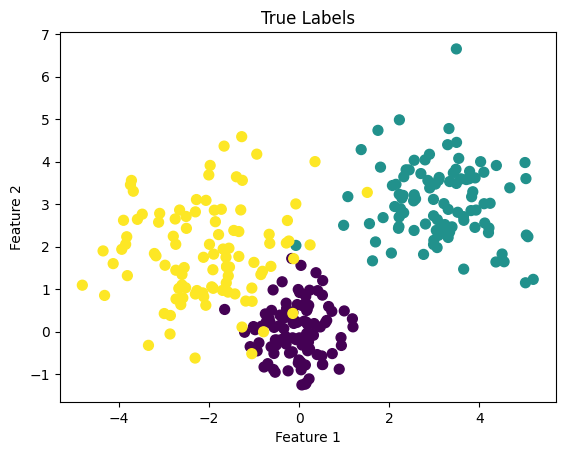

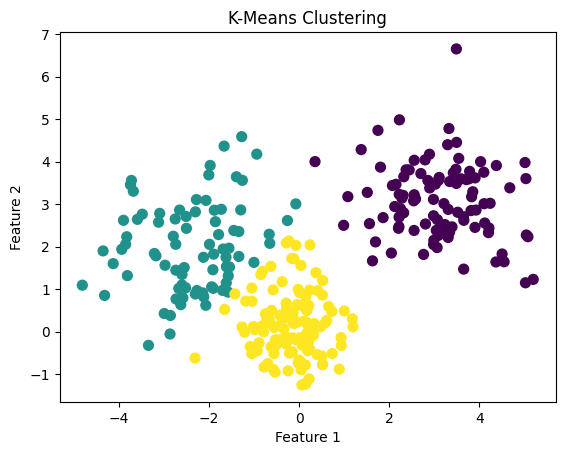

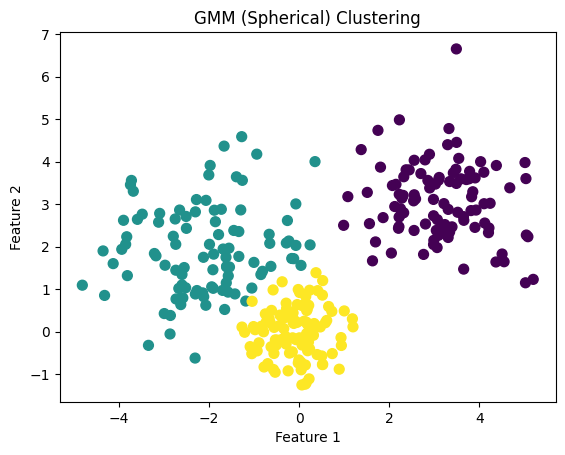

In [ ]:

#3.1
#importing required libraries -----------------------------------------------------------
import numpy as np #we use numpy for generating data and other mathematical operations.
import matplotlib.pyplot as plt # for plotting
from sklearn.cluster import KMeans #we are using kmeans from sklearn
from sklearn.mixture import GaussianMixture # we are using Gaussian mixture from sklearn
# I am using Adjusted Rand score and normalized_mutual_info_score metrics to compare the model results.
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score


#dataset creation -----------------------------------------------------------------------
# Generating 3 spherical Gaussians (where the covariance matrix is the identity matrix times some positive scalar)
np.random.seed(42)

#Note: When I set the means of clusters too far from each other, There is no overlapped data points, and this will not help us in
#finding which model is better. So I have chosen the closer cluster centres (means) for better performance analysis
# Means for the 3 clusters
m1 = [0, 0] #means generally tell the centers of spherical gaussian distribution
m2 = [3, 3]
m3 = [-2, 2]

# Covariance matrices multiplied by scalars for 3 clusters
#np.eye(2) basically generates identity matrix with dimensions [2,2]. When multiplied by scalar, it explains the spreading
#factor of gaussian distribution
cov1 = np.eye(2) * 0.4  # This means the first Gaussian has equal variance (0.4) in both dimensions.
cov2 = np.eye(2) * 0.9  # 0.9 spread in both the dimensions
cov3 = np.eye(2) * 1.3  # 1.3 spread in both the dimensions

# Generate 100 points for each cluster (we can say 100 samples of dogs, cows and fox based on our example)
x1 = np.random.multivariate_normal(m1, cov1, 100)
x2 = np.random.multivariate_normal(m2, cov2, 100)
x3 = np.random.multivariate_normal(m3, cov3, 100)
# I choose 100 because, when I set the number to less, there are very few overlapped, and this will not help us in
#finding which model is better, so I choose 100.
# Combine the three clusters into one dataset (from the example, this can be heights and weights(coordiates of data points)
# of all three animals stacking into one column )
X = np.vstack([x1, x2, x3])

#So, X has whole data of the clusters combined,
#Model fitting ------------------------------------------------------------------------------------
#now we perform K-means and GMM.

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Gaussian Mixture Model with spherical covariance
gmm = GaussianMixture(n_components=3, covariance_type='spherical', random_state=42)
gmm_labels = gmm.fit_predict(X)

#Performance metrics and analysis -----------------------------------------------------------------------
# Compute clustering performance metrics

# Creating the labels, so it can be evaluated with the predicted labels.
#
true_labels = np.array([0]*100 + [1]*100 + [2]*100) #from example, 0 can be dog, 1 can be fox and 2 can be cow.

#I am using two metrics

# a. Adjusted Rand Index
ari_kmeans = adjusted_rand_score(true_labels, kmeans_labels)
ari_gmm = adjusted_rand_score(true_labels, gmm_labels)
# b. Normalized Mutual Information
nmi_kmeans = normalized_mutual_info_score(true_labels, kmeans_labels)
nmi_gmm = normalized_mutual_info_score(true_labels, gmm_labels)



# Print Kmeans results
print("K-Means Metrics:")
print(f"ARI: {ari_kmeans}")
print(f"NMI: {nmi_kmeans}")
# Printing GMM results
print("\nGMM Metrics:")
print(f"ARI: {ari_gmm}")
print(f"NMI: {nmi_gmm}")

#Plotting the results ---------------------------------------------------------------------
#since i am plotting 3 graphs, original data, k-means cluster result, gmm cluster result,
# i will write the function for plotting and use the same for 3 plots.
#
def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plotting true labels
plot_clusters(X, true_labels, 'True Labels') # from example this gives the plot of heights,
                                              #weights (coordinates of data points) of all 3 animals.

# Plotting K-means cluster result
plot_clusters(X, kmeans_labels, 'K-Means Clustering')

# Plotting GMM cluster result
plot_clusters(X, gmm_labels, 'GMM (Spherical) Clustering')


K-Means Metrics:
ARI: 0.5316390890023596
NMI: 0.5496583650093707

GMM sphercial Metrics:
ARI: 0.49817285357729907
NMI: 0.5262542429803935

GMM diag Metrics:
ARI: 0.6929010129625742
NMI: 0.6409464082872034


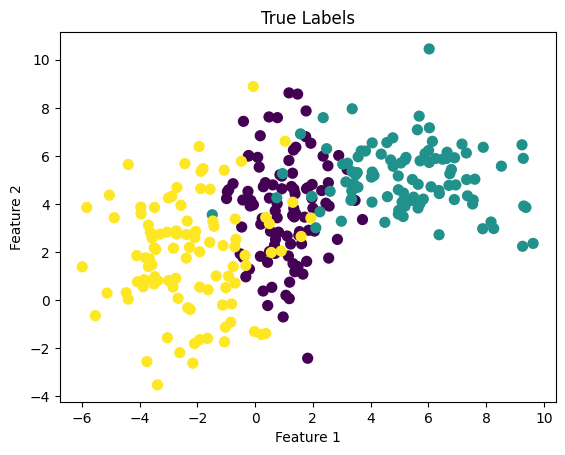

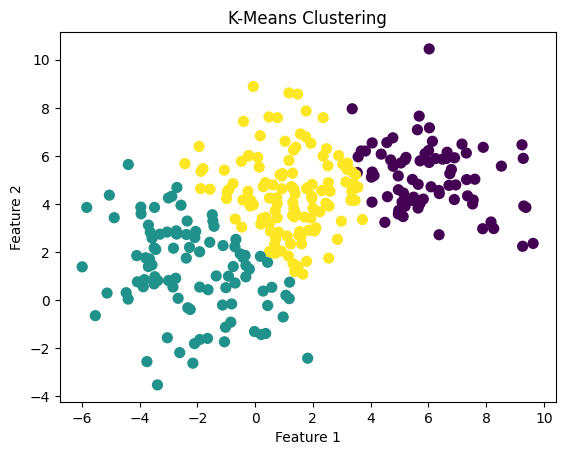

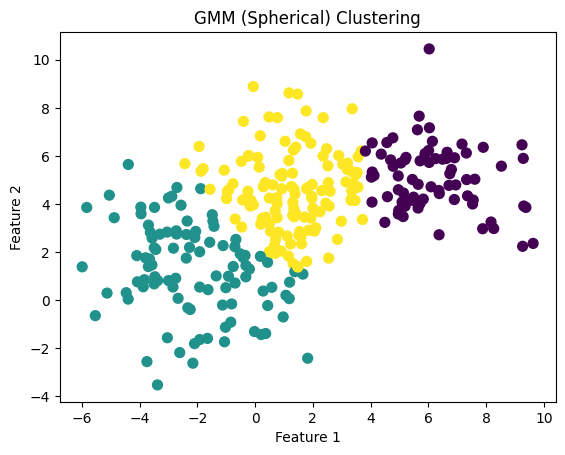

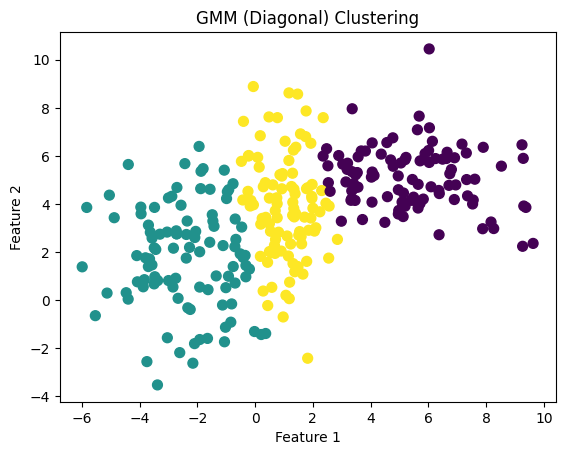

In [ ]:

#3.2
#importing required libraries -----------------------------------------------------------
import numpy as np #we use numpy for generating data and other mathematical operations.
import matplotlib.pyplot as plt # for plotting
from sklearn.cluster import KMeans #we are using kmeans from sklearn
from sklearn.mixture import GaussianMixture # we are using Gaussian mixture from sklearn
# I am using Adjusted Rand score and normalized_mutual_info_score metrics to compare the model results.
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score


#dataset creation -----------------------------------------------------------------------
# Generating 3 spherical Gaussians (where the covariance matrix can have non-zero values on the diagonal, and zeros elsewhere)
np.random.seed(42)

#Note: When I set the means of clusters too far from each other, There is no overlapped data points, and this will not help us in
#finding which model is better. So I have chosen the closer cluster centres (means) for better performance analysis
# Means for the 3 clusters
m1 = [1, 4] #means generally tell the centers of spherical gaussian distribution
m2 = [5, 5]
m3 = [-2, 2]

# Covariance matrices having non zero values on the diagonal and zeros elsewhere
cov1 = [[1, 0], [0, 6]]  # Wider spread along y-axis
cov2 = [[4, 0], [0, 2 ]]  # Wider spread along x-axis
cov3 = [[3, 0], [0, 5]]  # Wider spread along y-axis

# Generate 100 points for each cluster (we can say 100 samples of dogs, cows and fox based on our example)
x1 = np.random.multivariate_normal(m1, cov1, 100)
x2 = np.random.multivariate_normal(m2, cov2, 100)
x3 = np.random.multivariate_normal(m3, cov3, 100)
# I choose 100 because, when I set the number to less, there are very few overlapped, and this will not help us in
#finding which model is better, so I choose 100.
# Combine the three clusters into one dataset (from the example, this can be heights and weights(coordiates of data points)
# of all three animals stacking into one column )
X = np.vstack([x1, x2, x3])

#So, X has whole data of the clusters combined,
#Model fitting ------------------------------------------------------------------------------------
#now we perform K-means and GMM.

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
# Gaussian Mixture Model with spherical covariance
gmm = GaussianMixture(n_components=3, covariance_type='spherical', random_state=42)
gmm_labels = gmm.fit_predict(X)
#Gaussian Mixture Model with diagonal covariance
gmm_diag = GaussianMixture(n_components=3, covariance_type='diag', random_state=42)
gmm_diag_labels = gmm_diag.fit_predict(X)

#Performance metrics and analysis -----------------------------------------------------------------------
# Creating the labels, so it can be evaluated with the predicted labels.
true_labels = np.array([0]*100 + [1]*100 + [2]*100) #from example, 0 can be dog, 1 can be fox and 2 can be cow.

#I am using two metrics
# a. Adjusted Rand Index
ari_kmeans = adjusted_rand_score(true_labels, kmeans_labels)
ari_gmm = adjusted_rand_score(true_labels, gmm_labels)
ari_gmm_diag = adjusted_rand_score(true_labels, gmm_diag_labels)
# b. Normalized Mutual Information
nmi_kmeans = normalized_mutual_info_score(true_labels, kmeans_labels)
nmi_gmm = normalized_mutual_info_score(true_labels, gmm_labels)
nmi_gmm_diag = normalized_mutual_info_score(true_labels, gmm_diag_labels)

# Print Kmeans results
print("K-Means Metrics:")
print(f"ARI: {ari_kmeans}")
print(f"NMI: {nmi_kmeans}")
# Printing GMM spherical covariance results
print("\nGMM sphercial Metrics:")
print(f"ARI: {ari_gmm}")
print(f"NMI: {nmi_gmm}")
# Printing GMM diagonal covariance results
print("\nGMM diag Metrics:")
print(f"ARI: {ari_gmm_diag}")
print(f"NMI: {nmi_gmm_diag}")

#Plotting the results ---------------------------------------------------------------------
#since i am plotting 4 graphs, original data, k-means cluster result, gmm spherical cluster result, gmm diagonal cluster.
# i will write the function for plotting and use the same for 3 plots.
#
def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plotting true labels
plot_clusters(X, true_labels, 'True Labels') # from example this gives the plot of heights,
                                              #weights (coordinates of data points) of all 3 animals.

# Plotting K-means cluster result
plot_clusters(X, kmeans_labels, 'K-Means Clustering')

# Plotting GMM cluster result
plot_clusters(X, gmm_labels, 'GMM (Spherical) Clustering')

# Plotting GMM cluster result
plot_clusters(X, gmm_diag_labels, 'GMM (Diagonal) Clustering')


K-Means Metrics:
ARI: 0.5599509377277903
NMI: 0.5783329524263763

GMM (Diagonal) Metrics:
ARI: 0.5176906166539922
NMI: 0.5765957931151816

GMM (Full) Metrics:
ARI: 0.604013246674675
NMI: 0.6261055082994317


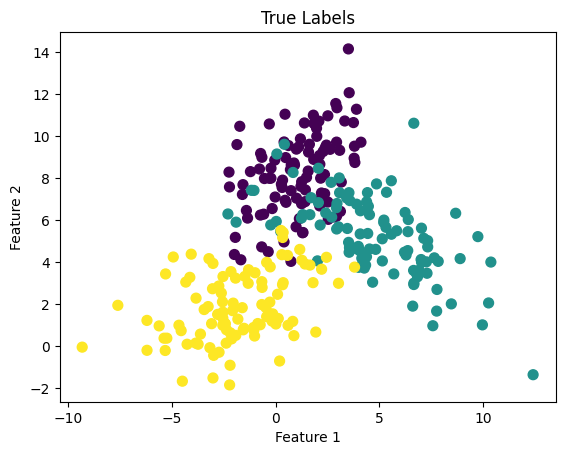

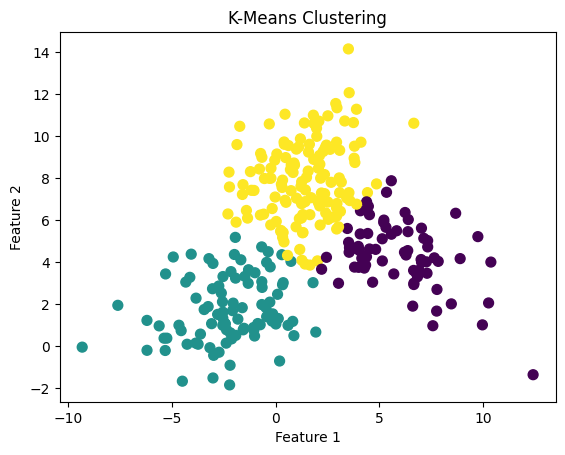

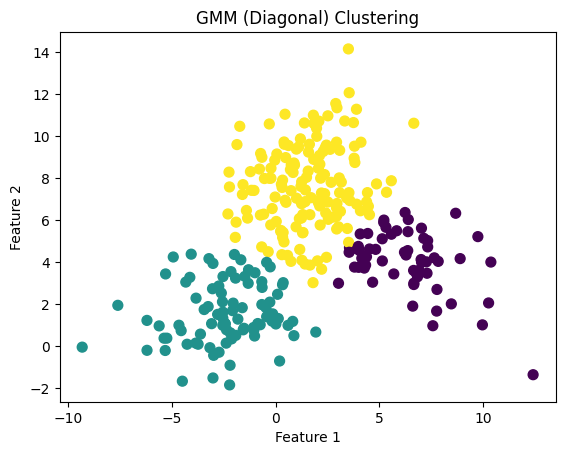

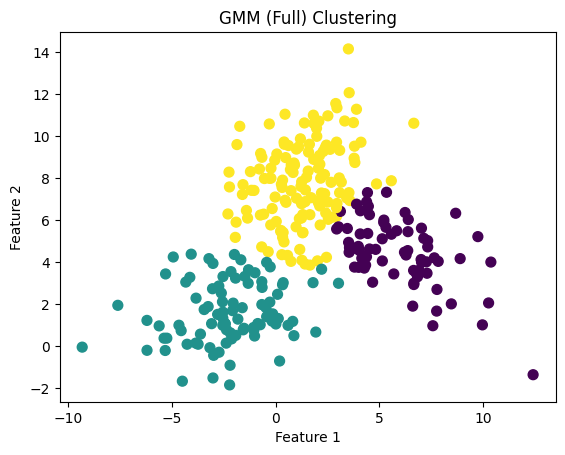

In [ ]:

#3.3
#importing required libraries -----------------------------------------------------------
import numpy as np #we use numpy for generating data and other mathematical operations.
import matplotlib.pyplot as plt # for plotting
from sklearn.cluster import KMeans #we are using kmeans from sklearn
from sklearn.mixture import GaussianMixture # we are using Gaussian mixture from sklearn
# I am using Adjusted Rand score and normalized_mutual_info_score metrics to compare the model results.
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score


#dataset creation -----------------------------------------------------------------------
# Generating 3 spherical Gaussians (where a mixture of 3 Gaussians with unrestricted covariance matrices)
np.random.seed(42)

#Note: When I set the means of clusters too far from each other, There is no overlapped data points, and this will not help us in
#finding which model is better. So I have chosen the closer cluster centres (means) for better performance analysis
# Means for the 3 clusters
m1 = [1, 8] #means generally tell the centers of spherical gaussian distribution
m2 = [5, 5]
m3 = [-2, 2]

# Covariance matrices with off-diagonal values (representing correlation between features)
cov1 = [[3, 2], [2, 5]]  # Correlated features
cov2 = [[7, -3], [-3, 4]]  # Negative correlation
cov3 = [[5, 1.5], [1.5, 3]]  # Correlated features

# Generate 100 points for each cluster (we can say 100 samples of dogs, cows and fox based on our example)
x1 = np.random.multivariate_normal(m1, cov1, 100)
x2 = np.random.multivariate_normal(m2, cov2, 100)
x3 = np.random.multivariate_normal(m3, cov3, 100)
# I choose 100 because, when I set the number to less, there are very few overlapped, and this will not help us in
#finding which model is better, so I choose 100.
# Combine the three clusters into one dataset (from the example, this can be heights and weights(coordiates of data points)
# of all three animals stacking into one column )
X = np.vstack([x1, x2, x3])

#So, X has whole data of the clusters combined,
#Model fitting ------------------------------------------------------------------------------------
#now we perform K-means and GMM.

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
#Gaussian Mixture Model with diagonal covariance
gmm_diag = GaussianMixture(n_components=3, covariance_type='diag', random_state=42)
gmm_diag_labels = gmm_diag.fit_predict(X)
# Gaussian Mixture Model with full covariance
gmm_full = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm_full_labels = gmm_full.fit_predict(X)

#Performance metrics and analysis -----------------------------------------------------------------------
# Creating the labels, so it can be evaluated with the predicted labels.
true_labels = np.array([0]*100 + [1]*100 + [2]*100) #from example, 0 can be dog, 1 can be fox and 2 can be cow.

#I am using two metrics
# a. Adjusted Rand Index
ari_kmeans = adjusted_rand_score(true_labels, kmeans_labels)
ari_gmm_full = adjusted_rand_score(true_labels, gmm_full_labels)
ari_gmm_diag = adjusted_rand_score(true_labels, gmm_diag_labels)
# b. Normalized Mutual Information
nmi_kmeans = normalized_mutual_info_score(true_labels, kmeans_labels)
nmi_gmm_diag = normalized_mutual_info_score(true_labels, gmm_diag_labels)
nmi_gmm_full = normalized_mutual_info_score(true_labels, gmm_full_labels)

# Print metrics for comparison
print("K-Means Metrics:")
print(f"ARI: {ari_kmeans}")
print(f"NMI: {nmi_kmeans}")

print("\nGMM (Diagonal) Metrics:")
print(f"ARI: {ari_gmm_diag}")
print(f"NMI: {nmi_gmm_diag}")

print("\nGMM (Full) Metrics:")
print(f"ARI: {ari_gmm_full}")
print(f"NMI: {nmi_gmm_full}")

# Plotting the results ---------------------------------------------------------------------
def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plotting true labels
plot_clusters(X, true_labels, 'True Labels')

# Plotting K-means cluster result
plot_clusters(X, kmeans_labels, 'K-Means Clustering')

# Plotting GMM with diagonal covariance result
plot_clusters(X, gmm_diag_labels, 'GMM (Diagonal) Clustering')

# Plotting GMM with full covariance result
plot_clusters(X, gmm_full_labels, 'GMM (Full) Clustering')